# BT5430 Assignment 2 
#### Hrutik Ravindra Pawar, Dhara Patel, Atharva Mandar Phatak

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
from scipy.constants import R

## Main Code

In [19]:
temperatures = np.arange(278, 369, 20)
N = 15 
sigma = 1e-3

def zimm_bragg_df(N, sigma, s_values, T):
    microstates = [''.join(seq) for seq in product('CH', repeat=N)]
    data = []
    
    for chain in microstates:
        total_weight = 1
        for i in range(len(chain) - 1):
            weights = {('C', 'H'): sigma*s_values[i], ('H', 'C'): 1, ('C', 'C'): 1, ('H', 'H'): s_values[i]}
            pair = (chain[i], chain[i+1])
            total_weight *= weights.get(pair)
        
        num_H = chain.count('H')
        data.append([chain, num_H, total_weight])

    df = pd.DataFrame(data, columns=["Microstate", "Num_H", "Weight"])
    grouped_df = df.groupby("Num_H", as_index=False).agg({"Weight": "sum"})
    total_weight = grouped_df["Weight"].sum()
    grouped_df["Probability"] = grouped_df["Weight"] / total_weight
    grouped_df["G_i"] = -R * T * np.log(grouped_df["Probability"])
    return grouped_df

def plot(N, sigma, s_values, title):
    plt.figure(figsize=(10, 8))
    for T in temperatures:
        grouped_df = zimm_bragg_df(N, sigma, s_values, T)
        plt.plot(
            grouped_df["Num_H"], 
            grouped_df["G_i"],
            label=f"T = {T}K", 
            marker='o',
            linewidth=2.0
        )
    plt.xlabel("Number of Helical Residues", fontsize=12)
    plt.ylabel("Free Energy (J/mol)", fontsize=12)
    plt.title(f"Free energy profile for {title}", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Case 1: S = 10 (S > 1)

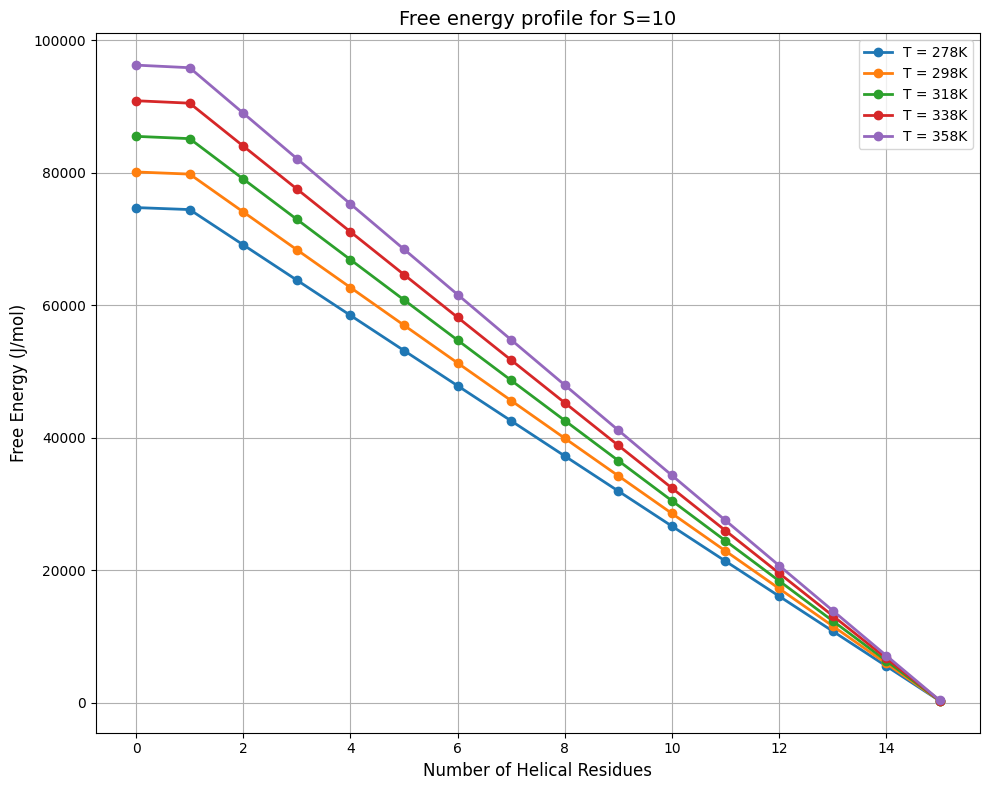

In [20]:
s_values = [10,]*14 
plot(N,sigma,s_values,'S=10')

#### Case 2: S = 0.21 (S < 1)

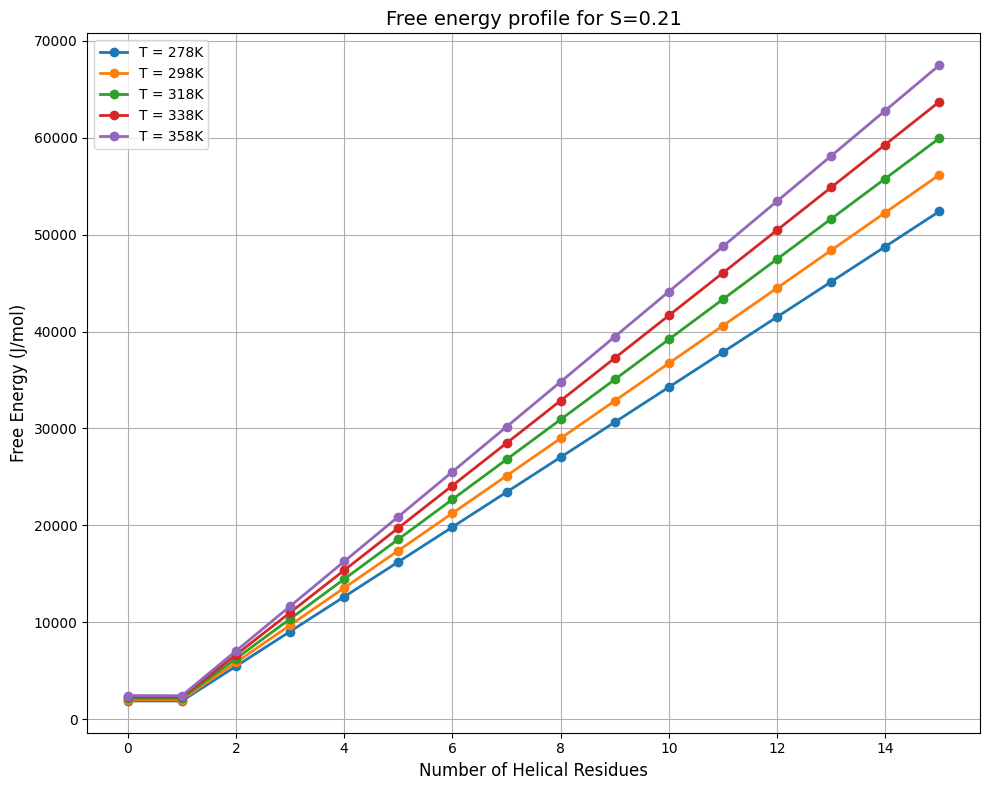

In [21]:
s_values = [0.21,]*14 
plot(N,sigma,s_values, 'S=0.21')

#### Case 3: Mised Case (Varying S)

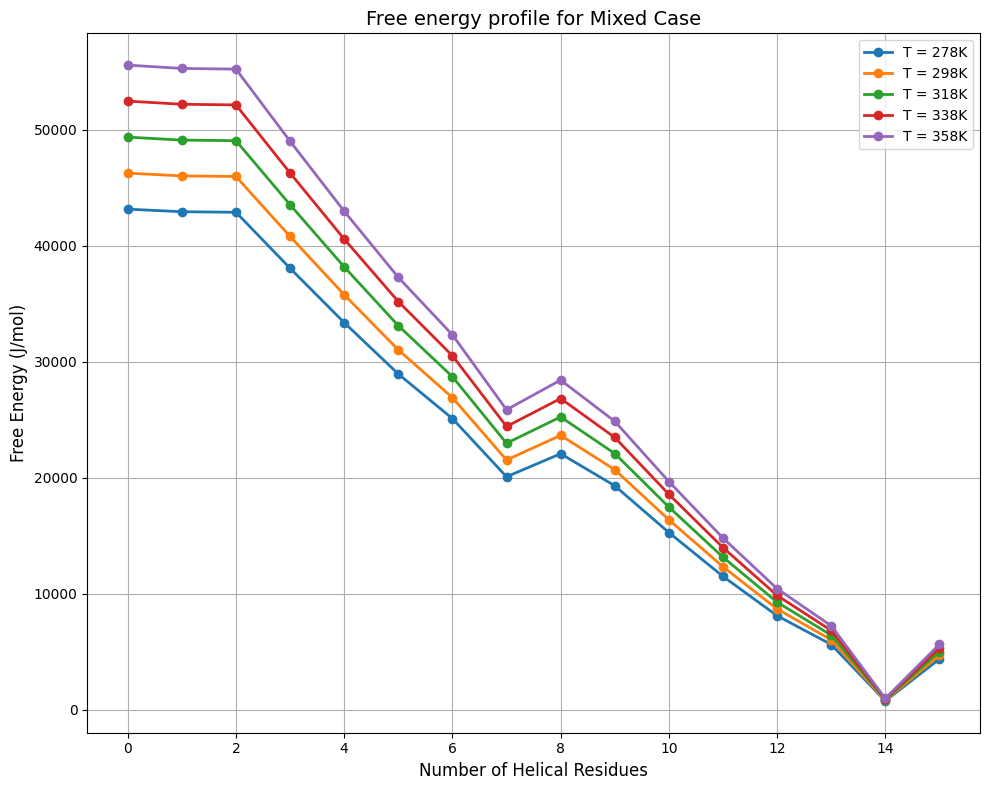

In [22]:
s_values = [0.21,10,10,10,10,10,0.21,0.21,10,10,10,10,10,0.21]
plot(N,sigma,s_values,'Mixed Case')

## Appendix 

In [23]:
temperatures = np.arange(278, 369, 20)
N = 15 
sigma = 1e-3

def zimm_bragg_df(N, sigma, s_values, T):
    microstates = [''.join(seq) for seq in product('CH', repeat=N)]
    data = []
    
    for chain in microstates:
        total_weight = 1
        for i in range(len(chain) - 1):
            weights = {('C', 'H'): sigma*s_values[i], ('H', 'C'): 1, ('C', 'C'): 1, ('H', 'H'): s_values[i]}
            pair = (chain[i], chain[i+1])
            total_weight *= weights.get(pair)
        
        num_H = chain.count('H')
        data.append([chain, num_H, total_weight])

    df = pd.DataFrame(data, columns=["Microstate", "Num_H", "Weight"])
    grouped_df = df.groupby("Num_H", as_index=False).agg({"Weight": "sum"})
    total_weight = grouped_df["Weight"].sum()
    grouped_df["Probability"] = grouped_df["Weight"] / total_weight
    grouped_df["G_i"] = -R * T * np.log(grouped_df["Probability"])
    return grouped_df

def plot(N, sigma, s_values, title):
    plt.figure(figsize=(10, 8))
    for T in temperatures:
        grouped_df = zimm_bragg_df(N, sigma, s_values, T)
        plt.plot(
            grouped_df["Num_H"][14:], 
            grouped_df["G_i"][14:],
            label=f"T = {T}K", 
            marker='o',
            linewidth=2.0
        )
    plt.xlabel("Number of Helical Residues", fontsize=12)
    plt.ylabel("Free Energy (J/mol)", fontsize=12)
    plt.title(f"Free energy profile for {title}", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


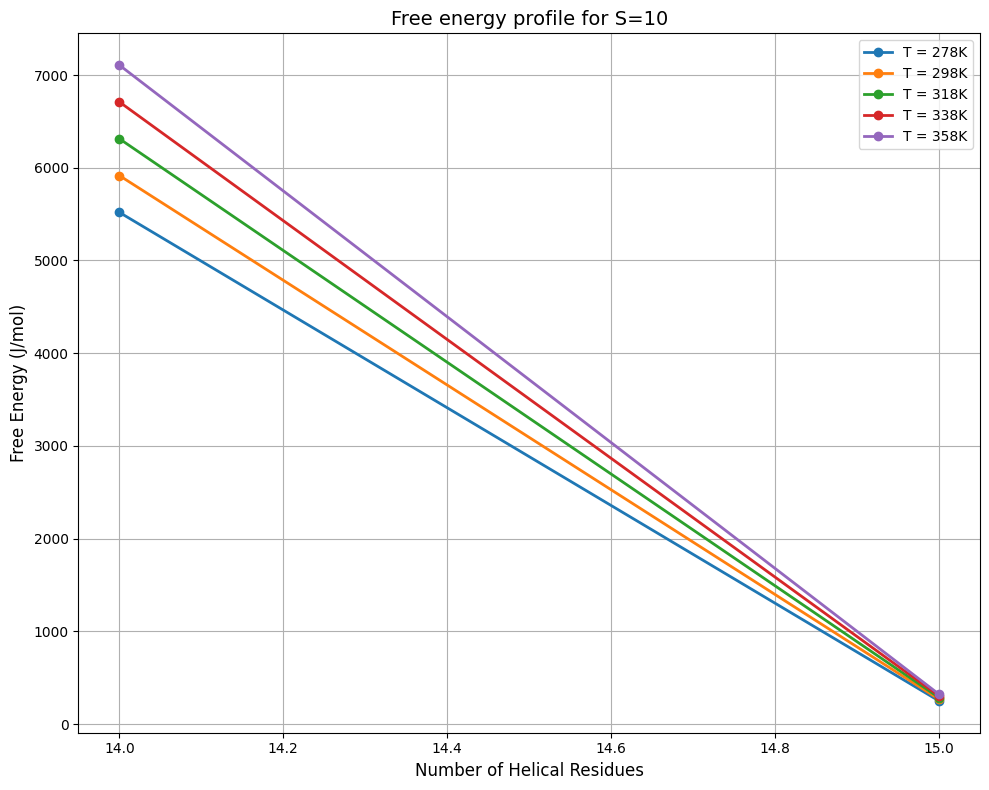

In [24]:
s_values = [10,]*14 
plot(N,sigma,s_values,'S=10')

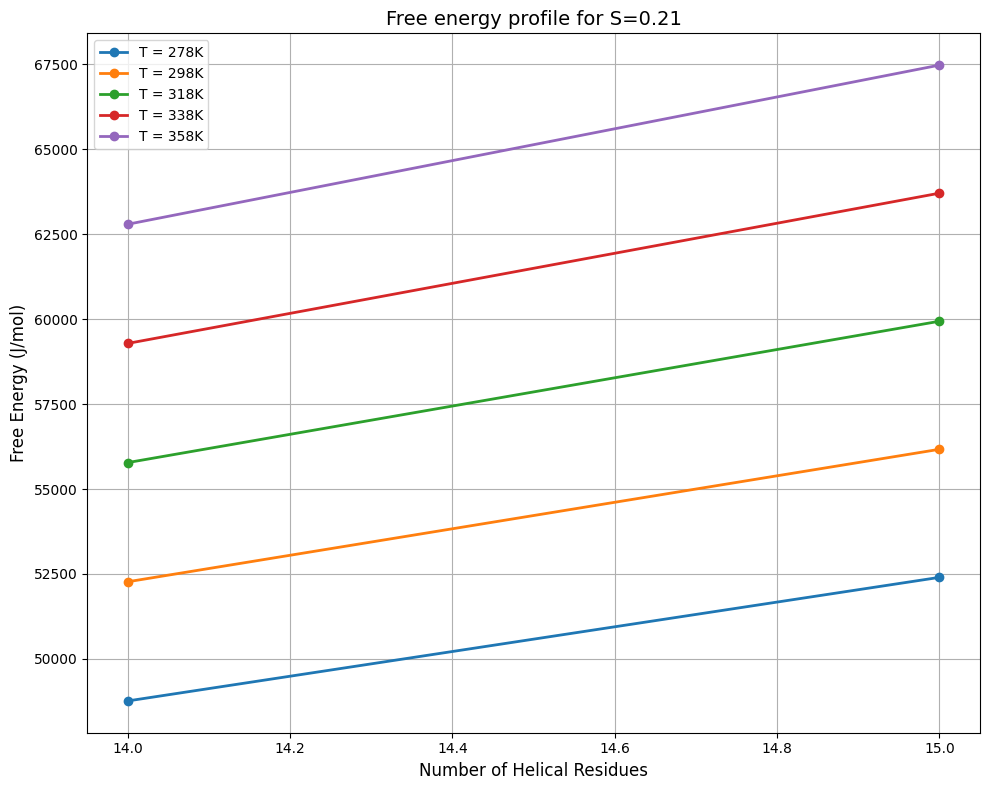

In [25]:
s_values = [0.21,]*14 
plot(N,sigma,s_values,'S=0.21')

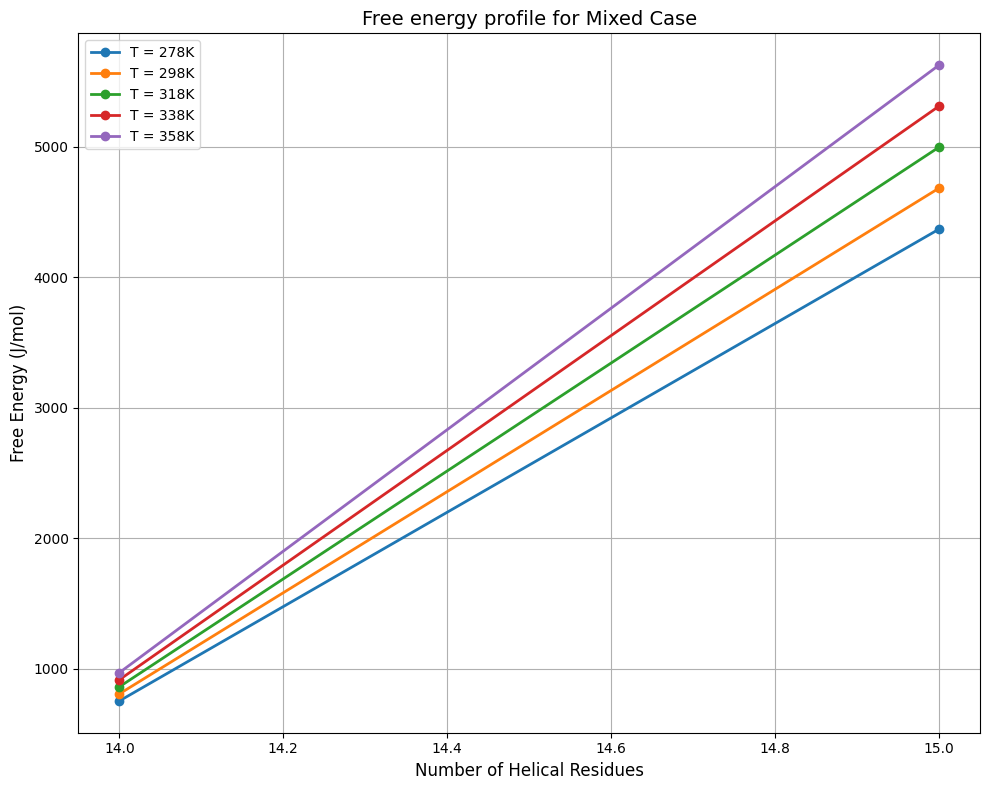

In [26]:
s_values = [0.21,10,10,10,10,10,0.21,0.21,10,10,10,10,10,0.21]
plot(N,sigma,s_values,'Mixed Case')